In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import os
from PIL import Image
import hashlib


In [3]:
# Define paths
processed_dataset_path = "../Datasets/Processed_asl_alphabet"
train_path = Path(processed_dataset_path) / "train"
test_path = Path(processed_dataset_path) / "test"


In [4]:
# Function to count images in each class
def count_images(dataset_path):
    class_counts = {}
    for class_dir in dataset_path.iterdir():
        if class_dir.is_dir():
            class_counts[class_dir.name] = len(list(class_dir.glob("*.jpg")))
    return class_counts

# Count images in train and test sets
train_counts = count_images(train_path)
test_counts = count_images(test_path)

print("Total number of images in the training set:", sum(train_counts.values()))
print("Total number of images in the test set:", sum(test_counts.values()))
print("Classes in the dataset:", sorted(train_counts.keys()))


Total number of images in the training set: 62400
Total number of images in the test set: 15600
Classes in the dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


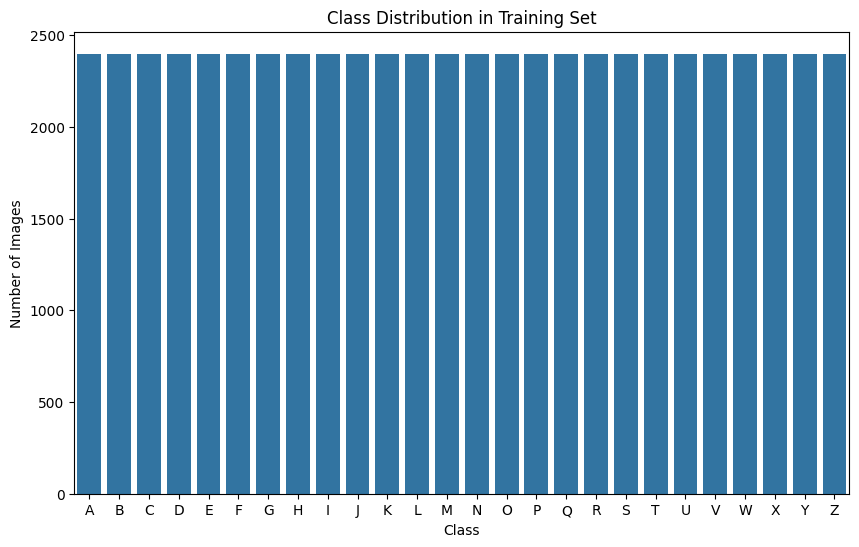

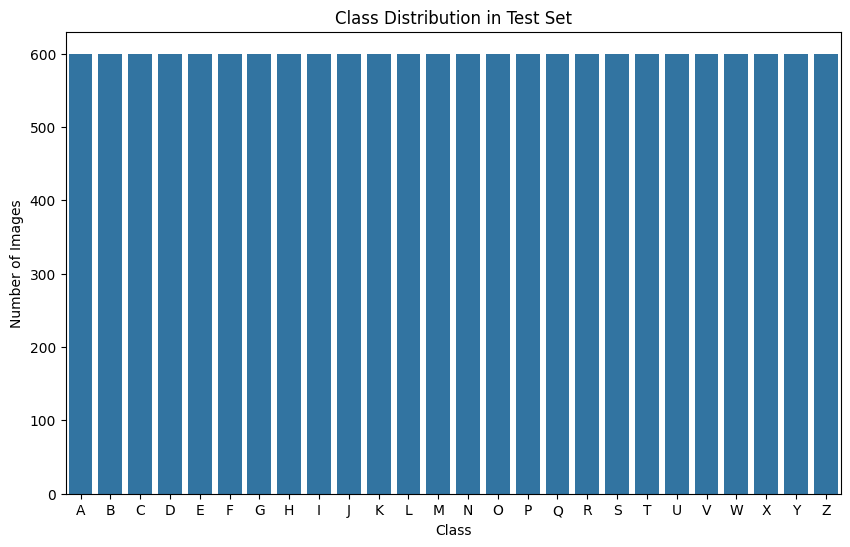

In [5]:
# Plot class distributions
def plot_distribution(counts, title):
    classes, values = zip(*sorted(counts.items()))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(classes), y=list(values))
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.show()

plot_distribution(train_counts, "Class Distribution in Training Set")
plot_distribution(test_counts, "Class Distribution in Test Set")


In [6]:
def check_image_dimensions(dataset_path):
    dimensions = []
    for class_dir in dataset_path.iterdir():
        for img_path in class_dir.glob("*.jpg"):
            with Image.open(img_path) as img:
                dimensions.append(img.size)
    unique_dimensions = set(dimensions)
    print("Unique image dimensions:", unique_dimensions)

# Check dimensions in the training set
check_image_dimensions(train_path)

Unique image dimensions: {(200, 200)}


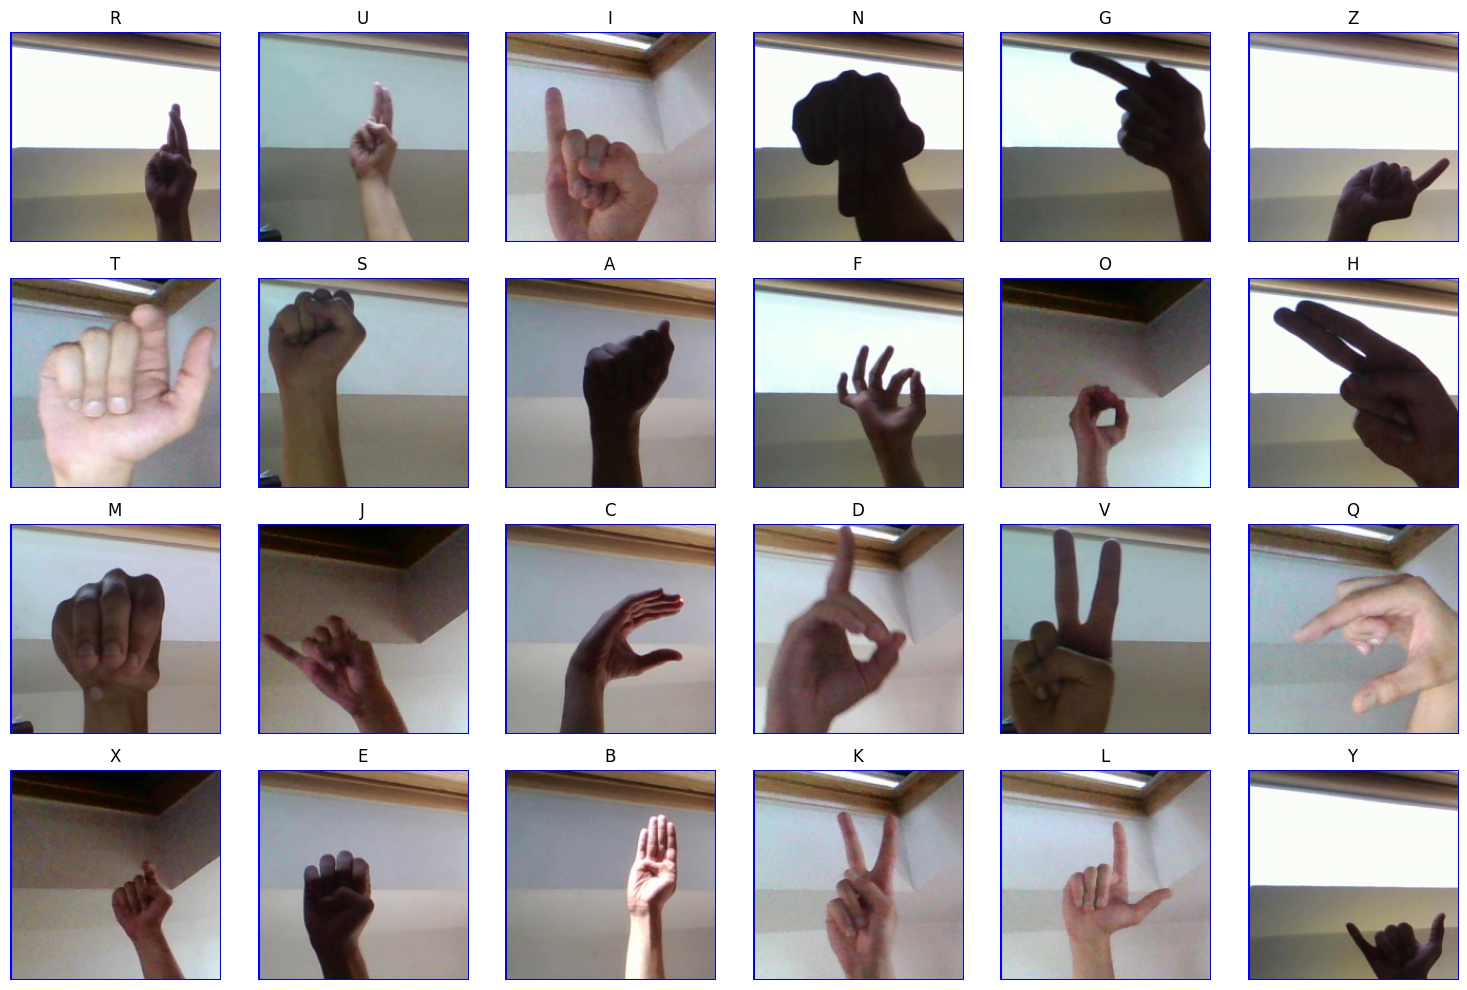

In [7]:

# Display sample images from the training set
def display_sample_images(dataset_path, classes):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(classes, 1):
        sample_image_path = next((dataset_path / cls).glob("*.jpg"))
        img = plt.imread(sample_image_path)
        plt.subplot(4, 6, i)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

sample_classes = list(train_counts.keys())[:24]  # Limit to first 24 classes
display_sample_images(train_path, sample_classes)


In [8]:
# def plot_pixel_intensity_distribution(dataset_path, sample_size=100):
#     intensities = []
#     for class_dir in dataset_path.iterdir():
#         for img_path in list(class_dir.glob("*.jpg"))[:sample_size]:
#             img = plt.imread(img_path)
#             intensities.extend(img.flatten())
#     plt.figure(figsize=(10, 6))
#     plt.hist(intensities, bins=50, color="blue", alpha=0.7)
#     plt.title("Pixel Intensity Distribution")
#     plt.xlabel("Pixel Intensity")
#     plt.ylabel("Frequency")
#     plt.show()

# # Plot pixel intensity distribution for the training set
# plot_pixel_intensity_distribution(train_path)

In [9]:
def find_duplicates(dataset_path):
    hashes = {}
    duplicates = []
    for class_dir in dataset_path.iterdir():
        for img_path in class_dir.glob("*.jpg"):
            with open(img_path, "rb") as img_file:
                img_hash = hashlib.md5(img_file.read()).hexdigest()
                if img_hash in hashes:
                    duplicates.append((hashes[img_hash], img_path))
                else:
                    hashes[img_hash] = img_path
    print(f"Found {len(duplicates)} duplicate images.")
    return duplicates

# Check for duplicates in the training set
duplicates = find_duplicates(train_path)
for original, duplicate in duplicates[:5]:  # Display a few duplicates
    print(f"Duplicate found: {original} and {duplicate}")


Found 0 duplicate images.
